In [27]:
##Kütüphaneler##

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [28]:
##Veri Seti Yükleme##

veri = pd.read_csv('student_performance.csv')


In [29]:
##Veri Ön İşleme Süreci##

veri.info()
veri.isna().sum()
veri.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                             --------------  ----- 
 0   gender;ethnicity;parental_level_of_education;lunch;test_preparation_course;math_score;reading_score;writing_score  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


,gender;ethnicity;parental_level_of_education;lunch;test_preparation_course;math_score;reading_score;writing_score
count,1000
unique,1000
top,female;group B;bachelor's degree;standard;none...
freq,1


In [30]:
##Label Encoding##

lencoders = {}
for col in veri.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    veri[col] = lencoders[col].fit_transform(veri[col])

In [31]:
##Standartlaştırma##

veri = StandardScaler().fit_transform(veri)
veri[0:5,0:5]

array([[-1.4982247 ],
       [-0.81233223],
       [-1.37698108],
       [ 0.07101412],
       [ 0.94396816]])

In [32]:
##Temel Bileşen Analizi##

tba = PCA(n_components = 2)
tba_fit = tba.fit_transform(veri)
temel_bilesenler_veri = pd.DataFrame(data = tba_fit, 
                          columns = ["temel_bilesen_bir","temel_bilesen_iki"])
temel_bilesenler_veri

ValueError: n_components=2 must be between 0 and min(n_samples, n_features)=1 with svd_solver='full'

In [26]:
##Açıklanan Varyans Oranları##

tba.explained_variance_ratio_

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [96]:
##Tüm Temel Bileşenler##

tba = PCA(n_components = 8)
tba_fit = tba.fit_transform(veri)
temel_bilesenler_veri = pd.DataFrame(data = tba_fit, 
                          columns = ["temel_bilesen_bir","temel_bilesen_iki","temel_bilesen_uc","temel_bilesen_dort","temel_bilesen_bes","temel_bilesen_alti","temel_bilesen_yedi","temel_bilesen_sekiz"])
tba.explained_variance_ratio_

veri_sns = pd.DataFrame({'Acıklanan Varyans Orani':tba.explained_variance_ratio_,
                         'Temel Bilesen':['TB1','TB2','TB3','TB4','TB5','TB6','TB7','TB8']})
veri_sns

,Acıklanan Varyans Orani,Temel Bilesen
0,0.375332,TB1
1,0.146745,TB2
2,0.129072,TB3
3,0.124356,TB4
4,0.118657,TB5
5,0.090902,TB6
6,0.010212,TB7
7,0.004723,TB8


Text(0, 0.5, 'Açıklanan Varyans Oranı')

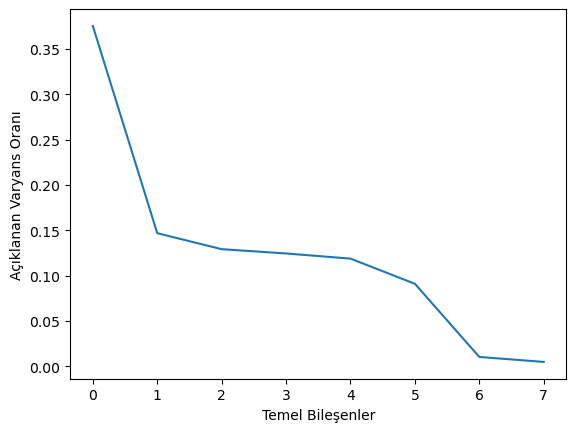

In [89]:
#Yamaç Grafiği##

plt.plot(tba.explained_variance_ratio_)
plt.xlabel('Temel Bileşenler')
plt.ylabel('Açıklanan Varyans Oranı')

Text(0, 0.5, 'Toplam Açıklanan Varyans Oranı')

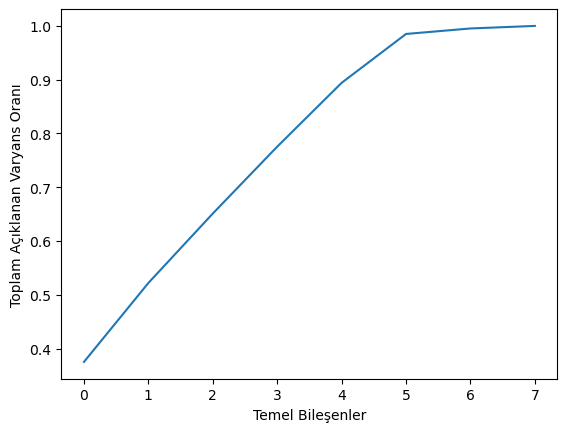

In [90]:
##Kümülatif Yamaç Grafiği##

plt.plot(np.cumsum(tba.explained_variance_ratio_))
plt.xlabel('Temel Bileşenler')
plt.ylabel('Toplam Açıklanan Varyans Oranı')

In [136]:
##Öznitelik Değişkenlerinin Temel Bileşenlerdeki Ağırlıkları##

col_cor=pd.DataFrame(tba.components_)
t=col_cor
features_names=pd.Series(t.columns)
s=pd.Series(["TB1", "TB2", "TB3", "TB4", "TB5", "TB6", "TB7", "TB8"])
d=pd.Series(["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8"])
t=t.set_index(s)
t=t.to_numpy()
t=t.round(2)

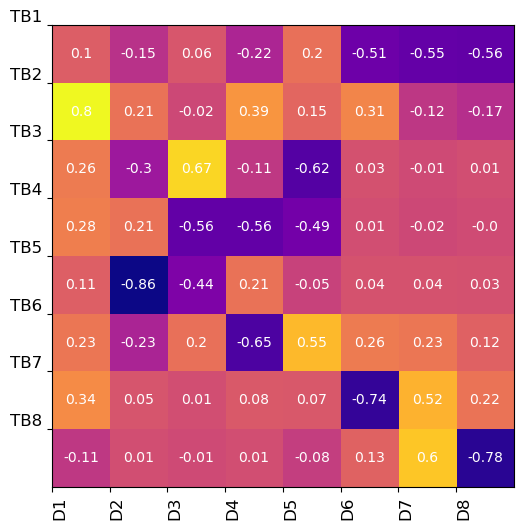

In [178]:
##Öznitelik Değişkenlerinin Temel Bileşenlerdeki Ağırlıklarının Görselleştirilmesi##

fig, ax = plt.subplots(figsize=(12,6))
plt.imshow(t, interpolation = 'none', cmap= 'plasma')
feature_names = features_names
ax.set_xticks(np.arange(-.5, 7));
ax.set_yticks(np.arange(-.5, 7));
ax.set_xticklabels(d, rotation=90, ha='left', fontsize=12);
ax.set_yticklabels(s, va='bottom', fontsize=12);
for i in range(len(s)):
    for j in range(len(feature_names)):
        text = ax.text(j, i, t[i, j],
                       ha="center", va="center", color="w")